# Notebook to explore if NORM = TRUE or FALSE affects the flux ouputs in CIGALE

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from pcigale import sed
from pcigale import sed_modules as modules
from copy import deepcopy
from astropy.table import Table
from astropy.io import fits

In [2]:
%pylab inline
%config InlineBackend.figure_format='svg'
matplotlib.rcParams['figure.figsize'] = [11.,5.]

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Function defined in order to cut the spectrum in a given range

def limit_spec(spectrum, L_min, L_max):
    wave, lum = spectrum
    xmin, xmax = L_min, L_max #This cut corresponds to ELODIE models
    mask = (wave >= xmin) & (wave <= xmax)
    return wave[mask], lum[mask]

# M011 models for High-Resolution continuum

In [4]:
gal_1     = sed.SED()
gal_2     = sed.SED()
gal_3     = sed.SED()

In [5]:
# SFH module is applied

mod_1 = modules.get_module('sfhdelayed', tau_main=500, age_main=5000,\
                           age_burst=20, tau_burst=50, f_burst=0.0, sfr_A = 1.0, normalise = True)
mod_1.process(gal_1)

mod_2 = modules.get_module('sfhdelayed', tau_main=10000, age_main=5000,\
                           age_burst=20, tau_burst=50, f_burst=0.0, sfr_A = 1.0, normalise = True)
mod_2.process(gal_2)

mod_3 = modules.get_module('sfhdelayed', tau_main=10000, age_main=5000,\
                           age_burst=50, tau_burst=1e4, f_burst=0.1, sfr_A = 1.0, normalise = True)
mod_3.process(gal_3)

# SSP module is applied

# The high-resolution model of C. Maraston and G. Strömbäck, 2011 is used
mod_1   = modules.get_module('m2005', imf = 0, metallicity = 0.02)
mod_1.process(gal_1)
star_emission_1 = gal_1.wavelength_grid, gal_1.fnu

mod_2   = modules.get_module('m2005', imf = 0, metallicity = 0.02)
mod_2.process(gal_2)
star_emission_2 = gal_2.wavelength_grid, gal_2.fnu

mod_3   = modules.get_module('m2005', imf = 0, metallicity = 0.02)
mod_3.process(gal_3)
star_emission_3 = gal_3.wavelength_grid, gal_3.fnu

# Dust Attenuation

mod_1 = modules.get_module('dustatt_modified_CF00', Av_ISM = 0.0, mu = 0.3, slope_ISM = -0.7, slope_BC = -0.7)
mod_1.process(gal_1)
attenuated_star_emission_1 = gal_1.wavelength_grid, gal_1.fnu

mod_2 = modules.get_module('dustatt_modified_CF00', Av_ISM = 0.5, mu = 0.3, slope_ISM = -0.7, slope_BC = -0.7)
mod_2.process(gal_2)
attenuated_star_emission_2 = gal_2.wavelength_grid, gal_2.fnu

mod_3 = modules.get_module('dustatt_modified_CF00', Av_ISM = 0.5, mu = 0.3, slope_ISM = -0.7, slope_BC = -0.7)
mod_3.process(gal_3)
attenuated_star_emission_3 = gal_3.wavelength_grid, gal_3.fnu

# Dust Emission

mod_1 = modules.get_module('dl2014', alpha=2.5)
mod_1.process(gal_1)
attenuated_star_emission_with_ir_1   = gal_1.wavelength_grid, gal_1.fnu

mod_2 = modules.get_module('dl2014', alpha=2.5)
mod_2.process(gal_2)
attenuated_star_emission_with_ir_2   = gal_2.wavelength_grid, gal_2.fnu

mod_3 = modules.get_module('dl2014', alpha=2.5)
mod_3.process(gal_3)
attenuated_star_emission_with_ir_3   = gal_3.wavelength_grid, gal_3.fnu

In [6]:
gal_1_1     = sed.SED()
gal_2_2     = sed.SED()
gal_3_3     = sed.SED()

In [7]:
# SFH module is applied

mod_1_1 = modules.get_module('sfhdelayed', tau_main=500, age_main=5000,\
                           age_burst=20, tau_burst=50, f_burst=0.0, sfr_A = 3.784e4, normalise = False)
mod_1_1.process(gal_1_1)

mod_2_2 = modules.get_module('sfhdelayed', tau_main=10000, age_main=5000,\
                           age_burst=20, tau_burst=50, f_burst=0.0, sfr_A = 3.784e4, normalise = False)
mod_2_2.process(gal_2_2)

mod_3_3 = modules.get_module('sfhdelayed', tau_main=10000, age_main=5000,\
                           age_burst=50, tau_burst=1e4, f_burst=0.1, sfr_A = 1.892e4, normalise = False)
mod_3_3.process(gal_3_3)

# SSP module is applied

# The high-resolution model of C. Maraston and G. Strömbäck, 2011 is used
mod_1_1   = modules.get_module('m2005', imf = 0, metallicity = 0.02)
mod_1_1.process(gal_1_1)
star_emission_1_1 = gal_1_1.wavelength_grid, gal_1_1.fnu

mod_2_2   = modules.get_module('m2005', imf = 0, metallicity = 0.02)
mod_2_2.process(gal_2_2)
star_emission_2_2 = gal_2_2.wavelength_grid, gal_2_2.fnu

mod_3_3   = modules.get_module('m2005', imf = 0, metallicity = 0.02)
mod_3_3.process(gal_3_3)
star_emission_3_3 = gal_3_3.wavelength_grid, gal_3_3.fnu

# Dust Attenuation

mod_1_1 = modules.get_module('dustatt_modified_CF00', Av_ISM = 0.0, mu = 0.3, slope_ISM = -0.7, slope_BC = -0.7)
mod_1_1.process(gal_1_1)
attenuated_star_emission_1_1 = gal_1_1.wavelength_grid, gal_1_1.fnu

mod_2_2 = modules.get_module('dustatt_modified_CF00', Av_ISM = 0.5, mu = 0.3, slope_ISM = -0.7, slope_BC = -0.7)
mod_2_2.process(gal_2_2)
attenuated_star_emission_2_2 = gal_2_2.wavelength_grid, gal_2_2.fnu

mod_3_3 = modules.get_module('dustatt_modified_CF00', Av_ISM = 0.5, mu = 0.3, slope_ISM = -0.7, slope_BC = -0.7)
mod_3_3.process(gal_3_3)
attenuated_star_emission_3_3 = gal_3_3.wavelength_grid, gal_3_3.fnu

# Dust Emission

mod_1_1 = modules.get_module('dl2014', alpha=2.5)
mod_1_1.process(gal_1_1)
attenuated_star_emission_with_ir_1_1   = gal_1_1.wavelength_grid, gal_1_1.fnu

mod_2_2 = modules.get_module('dl2014', alpha=2.5)
mod_2_2.process(gal_2_2)
attenuated_star_emission_with_ir_2_2   = gal_2_2.wavelength_grid, gal_2_2.fnu

mod_3_3 = modules.get_module('dl2014', alpha=2.5)
mod_3_3.process(gal_3_3)
attenuated_star_emission_with_ir_3_3   = gal_3_3.wavelength_grid, gal_3_3.fnu

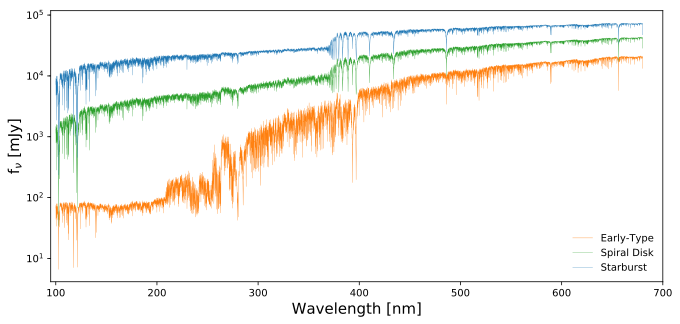

In [10]:
plt.figure()
plt.plot(*attenuated_star_emission_1, lw = 0.3, c = 'C1', label = 'Early-Type')
plt.plot(*attenuated_star_emission_2, lw = 0.3, c = 'C2', label = 'Spiral Disk')
plt.plot(*attenuated_star_emission_3, lw = 0.3, c = 'C0', label = 'Starburst')
plt.xlim(95, 700)
# plt.ylim(1e11, 3e15)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

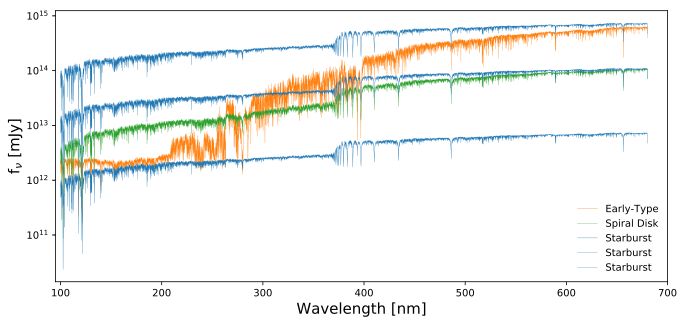

In [30]:
plt.figure()
plt.plot(attenuated_star_emission_1[0], 3e10*attenuated_star_emission_1[1], lw = 0.3, c = 'C1', label = 'Early-Type')
plt.plot(attenuated_star_emission_2[0], 2.5e9*attenuated_star_emission_2[1], lw = 0.3, c = 'C2', label = 'Spiral Disk')
plt.plot(attenuated_star_emission_3[0], 1.5e9*attenuated_star_emission_3[1], lw = 0.3, c = 'C0', label = 'Starburst')
plt.plot(attenuated_star_emission_3[0], 1e10*attenuated_star_emission_3[1], lw = 0.3, c = 'C0', label = 'Starburst')
plt.plot(attenuated_star_emission_3[0], 1e8*attenuated_star_emission_3[1], lw = 0.3, c = 'C0', label = 'Starburst')
plt.xlim(95, 700)
# plt.ylim(1e11, 3e15)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

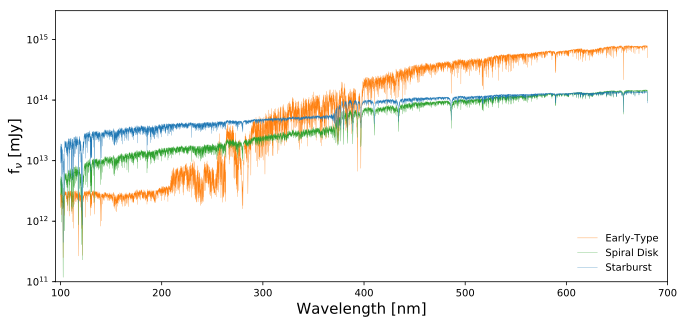

In [9]:
plt.figure()
plt.plot(*attenuated_star_emission_1_1, lw = 0.3, c = 'C1', label = 'Early-Type')
plt.plot(*attenuated_star_emission_2_2, lw = 0.3, c = 'C2', label = 'Spiral Disk')
plt.plot(*attenuated_star_emission_3_3, lw = 0.3, c = 'C0', label = 'Starburst')
plt.axvspan(760, 890, alpha=0.5, color='cornflowerblue')
plt.axvspan(930, 1350, alpha=0.3, color='green')
plt.axvspan(1520, 1640, alpha=0.3, color='red')
plt.xlim(95, 700)
plt.ylim(1e11, 3e15)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

# Testing redshifting so I can constrain the redshifts binning

In [72]:
# Redshifting the standard samples
gal_1_redshifted = deepcopy(gal_1_1)
gal_2_redshifted = deepcopy(gal_2_2)
gal_3_redshifted = deepcopy(gal_3_3)

gal_1_1_redshifted = deepcopy(gal_1_1)
gal_2_1_redshifted = deepcopy(gal_2_2)
gal_3_1_redshifted = deepcopy(gal_3_3)

gal_1_3_redshifted = deepcopy(gal_1_1)
gal_2_3_redshifted = deepcopy(gal_2_2)
gal_3_3_redshifted = deepcopy(gal_3_3)


In [73]:
# Redshifting M11 models
mod_1_red = modules.get_module('redshifting', redshift=1.5)
mod_1_red.process(gal_1_redshifted)
redshifted_1 = gal_1_redshifted.wavelength_grid, gal_1_redshifted.fnu

mod_2_red = modules.get_module('redshifting', redshift=1.5)
mod_2_red.process(gal_2_redshifted)
redshifted_2 = gal_2_redshifted.wavelength_grid, gal_2_redshifted.fnu

mod_3_red = modules.get_module('redshifting', redshift=1.5)
mod_3_red.process(gal_3_redshifted)
redshifted_3 = gal_3_redshifted.wavelength_grid, gal_3_redshifted.fnu

In [74]:
mod_1_1_red = modules.get_module('redshifting', redshift=2.5)
mod_1_1_red.process(gal_1_1_redshifted)
redshifted_1_1 = gal_1_1_redshifted.wavelength_grid, gal_1_1_redshifted.fnu

mod_2_1_red = modules.get_module('redshifting', redshift=2.5)
mod_2_1_red.process(gal_2_1_redshifted)
redshifted_2_1 = gal_2_1_redshifted.wavelength_grid, gal_2_1_redshifted.fnu

mod_3_1_red = modules.get_module('redshifting', redshift=2.5)
mod_3_1_red.process(gal_3_1_redshifted)
redshifted_3_1 = gal_3_1_redshifted.wavelength_grid, gal_3_1_redshifted.fnu

In [75]:
mod_1_3_red = modules.get_module('redshifting', redshift=6.0)
mod_1_3_red.process(gal_1_3_redshifted)
redshifted_1_3 = gal_1_3_redshifted.wavelength_grid, gal_1_3_redshifted.fnu

mod_2_3_red = modules.get_module('redshifting', redshift=6.0)
mod_2_3_red.process(gal_2_3_redshifted)
redshifted_2_3 = gal_2_3_redshifted.wavelength_grid, gal_2_3_redshifted.fnu

mod_3_3_red = modules.get_module('redshifting', redshift=6.0)
mod_3_3_red.process(gal_3_3_redshifted)
redshifted_3_3 = gal_3_3_redshifted.wavelength_grid, gal_3_3_redshifted.fnu

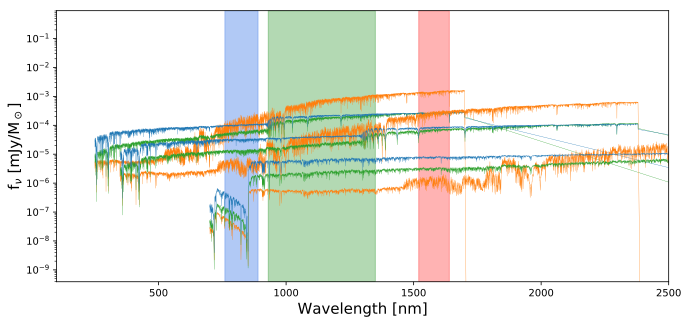

In [79]:
plt.figure()
plt.plot(*redshifted_1, lw = 0.3, c = 'C1', label = 'Early-Type')
plt.plot(*redshifted_2, lw = 0.3, c = 'C2', label = 'Spiral Disk')
plt.plot(*redshifted_3, lw = 0.3, c = 'C0', label = 'Starburst')
plt.plot(*redshifted_1_1, lw = 0.3, c = 'C1', label = 'Early-Type')
plt.plot(*redshifted_2_1, lw = 0.3, c = 'C2', label = 'Spiral Disk')
plt.plot(*redshifted_3_1, lw = 0.3, c = 'C0', label = 'Starburst')
plt.plot(*redshifted_1_3, lw = 0.3, c = 'C1', label = 'Early-Type')
plt.plot(*redshifted_2_3, lw = 0.3, c = 'C2', label = 'Spiral Disk')
plt.plot(*redshifted_3_3, lw = 0.3, c = 'C0', label = 'Starburst')
plt.axvspan(760, 890, alpha=0.5, color='cornflowerblue')
plt.axvspan(930, 1350, alpha=0.3, color='green')
plt.axvspan(1520, 1640, alpha=0.3, color='red')
plt.xlim(100, 2500)
# plt.ylim(1e11, 3e15)
plt.yscale('log')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$_\nu$ [mJy/M$_\odot$]', fontsize = 15);
# plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')